In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [12]:
Categories=['NORMAL','PNEUMONIA']

In [45]:
flat_data_arr=[]
target_arr=[]
flat_data_arr_test=[]
target_arr_test=[]

In [46]:
datadir = 'chest_xray/train'
datadir2 = 'chest_xray/test'

In [47]:
for i in Categories:

    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : NORMAL
loaded category:NORMAL successfully
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully


In [48]:
for i in Categories:

    print(f'loading... category : {i}')
    path=os.path.join(datadir2,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr_test.append(img_resized.flatten())
        target_arr_test.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : NORMAL
loaded category:NORMAL successfully
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully


In [86]:
flat_data_test=np.array(flat_data_arr_test)
target_test=np.array(target_arr_test)
df=pd.DataFrame(flat_data_test)
df['Target']=target_test
x_test2=df.iloc[:,:-1]
y_test2=df.iloc[:,-1]

In [87]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

df=pd.DataFrame(flat_data)
df['Target']=target

x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.shape

(5216, 67500)

KeyboardInterrupt: 

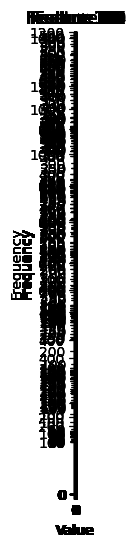

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure x_flat is a NumPy array with at least 2 dimensions
x_flat = np.array(x if x.ndim == 2 else x.reshape(x.shape[0], -1))

# Number of features to plot
num_features_to_plot = x_flat.shape[1]  # Plot up to 5 features or fewer if less are available

# Plotting
plt.figure(figsize=(12, 6))
for i in range(num_features_to_plot):
    plt.subplot(1, num_features_to_plot, i + 1)
    sns.histplot(x_flat[:, i], kde=True)  # KDE shows if data is close to a normal distribution
    plt.title(f"Feature {i + 1}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [127]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

In [161]:






# -------------------- test data used here is made using split ------------------------








In [162]:
classifer_Gauss = GaussianNB()
classifer_Ber = BernoulliNB()
classifer_Comp = ComplementNB()
classifer_Multi = MultinomialNB()
model_Gauss = classifer_Gauss.fit(x_train, y_train)
model_Ber = classifer_Ber.fit(x_train, y_train)
model_Comp = classifer_Comp.fit(x_train, y_train)
model_Multi = classifer_Multi.fit(x_train, y_train)

In [163]:
from sklearn.metrics import classification_report

In [ ]:
# for Gaussian NB


y_pred=model_Gauss.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Viral Pneumonia']))
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()
model_Gauss.score(x, y)

The predicted Data is :
[1 1 1 ... 1 0 0]
The actual data is:
[1 0 1 ... 0 1 0]
The model is 75.33546325878594% accurate
                 precision    recall  f1-score   support

         Normal       0.53      0.75      0.62       420
Viral Pneumonia       0.89      0.75      0.82      1145

       accuracy                           0.75      1565
      macro avg       0.71      0.75      0.72      1565
   weighted avg       0.79      0.75      0.76      1565



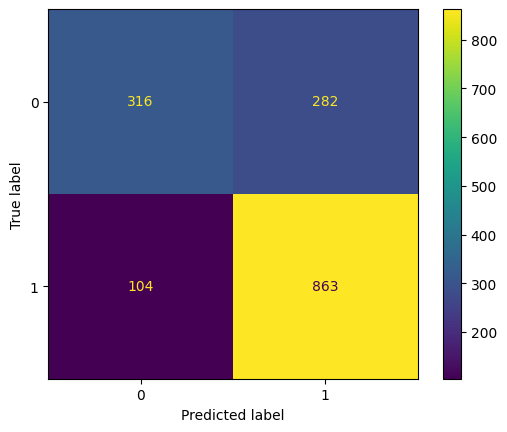

In [153]:
# for Bernoulli NB


y_pred=model_Ber.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Viral Pneumonia']))
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

The predicted Data is :
[0 0 1 ... 0 0 0]
The actual data is:
[1 0 1 ... 0 1 0]
The model is 78.33865814696486% accurate
                 precision    recall  f1-score   support

         Normal       0.56      0.87      0.68       420
Viral Pneumonia       0.94      0.75      0.84      1145

       accuracy                           0.78      1565
      macro avg       0.75      0.81      0.76      1565
   weighted avg       0.84      0.78      0.79      1565



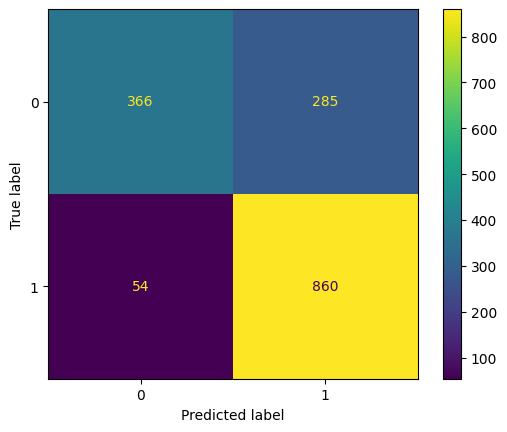

In [154]:
# for Complement NB


y_pred=model_Comp.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Viral Pneumonia']))
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

The predicted Data is :
[0 0 1 ... 0 0 0]
The actual data is:
[1 0 1 ... 0 1 0]
The model is 78.40255591054313% accurate
                 precision    recall  f1-score   support

         Normal       0.56      0.87      0.68       420
Viral Pneumonia       0.94      0.75      0.84      1145

       accuracy                           0.78      1565
      macro avg       0.75      0.81      0.76      1565
   weighted avg       0.84      0.78      0.80      1565



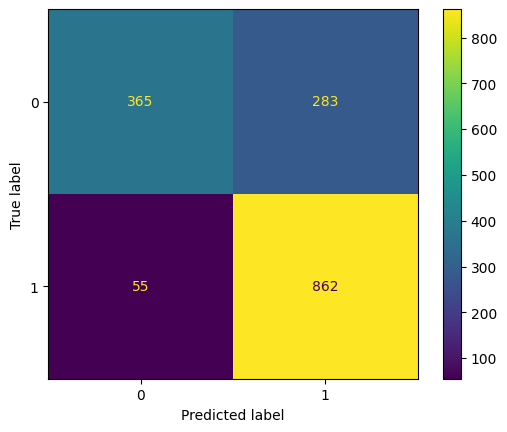

In [155]:
# for Multinomial NB


y_pred=model_Multi.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Viral Pneumonia']))
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

In [160]:





# -------------------- test data used here is the actual data in the test directory ------------------------





In [156]:
y_pred2=model_Gauss.predict(x_test2)
#print("The predicted Data is :")
#print(y_pred2)
#print("The actual data is:")
#print(np.array(y_test2))
print(f"The model is {accuracy_score(y_pred2,y_test2)*100}% accurate")

The model is 71.7948717948718% accurate


In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Normal', 'Viral Pneumonia']))
print(classification_report(y_test2, y_pred2, target_names=['Normal', 'Viral Pneumonia']))

                 precision    recall  f1-score   support

         Normal       0.56      0.87      0.68       420
Viral Pneumonia       0.94      0.75      0.84      1145

       accuracy                           0.78      1565
      macro avg       0.75      0.81      0.76      1565
   weighted avg       0.84      0.78      0.80      1565

                 precision    recall  f1-score   support

         Normal       0.62      0.63      0.63       234
Viral Pneumonia       0.78      0.77      0.77       390

       accuracy                           0.72       624
      macro avg       0.70      0.70      0.70       624
   weighted avg       0.72      0.72      0.72       624



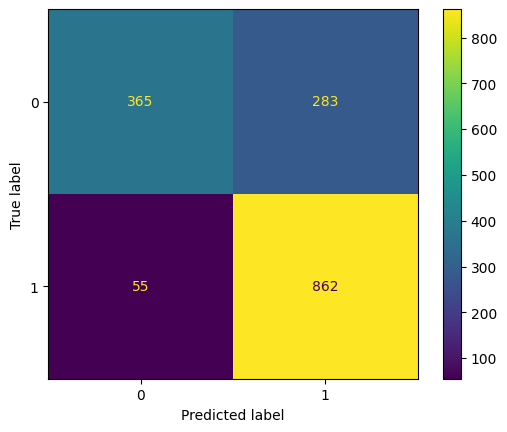

In [158]:
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

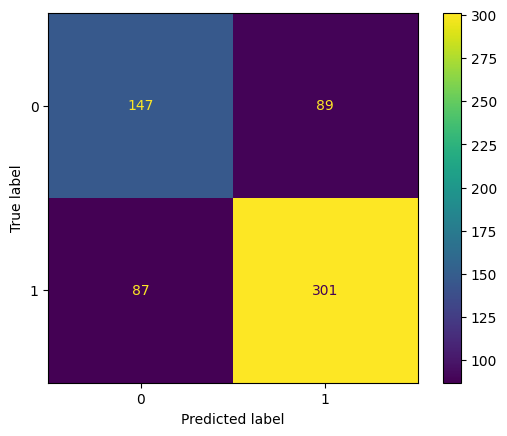

In [159]:
cm = confusion_matrix(y_pred2, y_test2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()